源代码修改过的部分：1.mseed_predictor修改了会造成import报错的'break';2.predictor中，279行csv.writer中增加newline=''，修改了会导致csv文件间隔一行输入的bug

In [1]:
import h5py
from EQTransformer.core.predictor import predictor

#f = h5py.File("../data/prediction/traces.hdf5","r")

In [4]:
predictor(input_dir='../data/prediction',   
         input_model='../data/EqT_model.h5',
         output_dir='../detections1',
         estimate_uncertainty=False, 
         output_probabilities=True,
         number_of_sampling=5,
         loss_weights=[0.02, 0.40, 0.58],          
         detection_threshold=0.01,                
         P_threshold=0.1,
         S_threshold=0.1, 
         number_of_plots=30,
         plot_mode='time',
         batch_size=500,
         number_of_cpus=4,
         keepPS=False,
         spLimit=60) 

Running EqTransformer  None
 *** Loading the model ...
*** Loading is complete!
 *** /home/fanglh/work/200902EQTransformer-master/bin/../detections1 already exists!
 --> Type (Yes or y) to create a new empty directory! otherwise it will overwrite!   y
######### There are files for 1 stations in ../data/prediction directory. #########
========= Started working on traces, 1 out of 1 ...
  0%|                                                                         | 0/1 [00:00<?, ?it/s]WARNING:tensorflow:multiprocessing can interact badly with TensorFlow, causing nondeterministic deadlocks. For high performance data pipelines tf.data is recommended.


 *** Finished the prediction in: 0 hours and 0 minutes and 25.16 seconds.
 *** Detected: 14 events.
 *** Wrote the results into --> " /home/fanglh/work/200902EQTransformer-master/bin/../detections1/traces_outputs "
100%|█████████████████████████████████████████████████████████████████| 1/1 [00:25<00:00, 25.16s/it]


In [2]:
predictor(input_dir='../data/ModelsAndSampleData',   
         input_model='../data/EqT_model.h5',
         output_dir='../detections1',
         estimate_uncertainty=False, 
         output_probabilities=False,
         number_of_sampling=5,
         loss_weights=[0.02, 0.40, 0.58],          
         detection_threshold=0.3,                
         P_threshold=0.1,
         S_threshold=0.1, 
         number_of_plots=10,
         plot_mode='time',
         batch_size=500,
         number_of_cpus=4,
         keepPS=False,
         spLimit=60) 

Running EqTransformer  None
 *** Loading the model ...
*** Loading is complete!
 *** E:\Working_Documents\200902EQTransformer-master\bin\../detections1 already exists!
 --> Type (Yes or y) to create a new empty directory! otherwise it will overwrite!   y
######### There are files for 1 stations in ../data/ModelsAndSampleData directory. #########
========= Started working on 100samples, 1 out of 1 ...
  0%|                                                                         | 0/1 [00:00<?, ?it/s]<HDF5 dataset "109C.TA_20060723155859_EV": shape (6000, 3), type "<f4">
<HDF5 dataset "109C.TA_20061103155652_EV": shape (6000, 3), type "<f4">
<HDF5 dataset "109C.TA_20061103161223_EV": shape (6000, 3), type "<f4">
<HDF5 dataset "109C.TA_20061114133221_EV": shape (6000, 3), type "<f4">
<HDF5 dataset "109C.TA_20061127104640_EV": shape (6000, 3), type "<f4">
<HDF5 dataset "109C.TA_20061129121745_EV": shape (6000, 3), type "<f4">
<HDF5 dataset "109C.TA_20061129211102_EV": shape (6000, 3), type

In [2]:
import matplotlib.pyplot as plt
import h5py
f = h5py.File("../detections1/traces_outputs/prediction_probabilities.hdf5","r")
max(f['probabilities']['GUL.GD_201701012310_EV'][:,0])

0.05955258

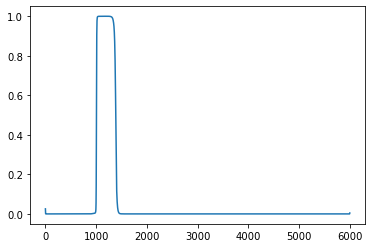

In [18]:
plt.plot(f['probabilities']['LVY.GD_201701012310_EV'][:,0])
plt.show()

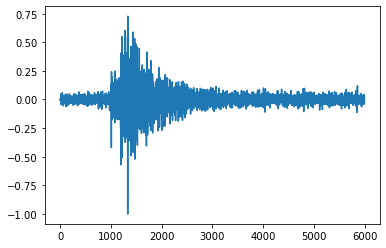

In [17]:
f2 = h5py.File("../data/prediction/traces.hdf5","r")
plt.plot(f2['data']['LVY.GD_201701012310_EV'][:,2])

In [12]:
f2['data'].keys()

<KeysViewHDF5 ['BLT.GD_201701012309_EV', 'BLT.GD_201701012310_EV', 'BLT.GD_201701020035_EV', 'BLT.GD_201701020116_EV', 'BLT.GD_201701020121_EV', 'BLT.GD_201701020137_EV', 'BLT.GD_201701020205_EV', 'BLT.GD_201701020255_EV', 'DFH.GD_201701020035_EV', 'DFH.GD_201701020116_EV', 'DFH.GD_201701020137_EV', 'DFH.GD_201701020255_EV', 'DOX.GD_201701012309_EV', 'DOX.GD_201701012310_EV', 'DOX.GD_201701020035_EV', 'DOX.GD_201701020049_EV', 'DOX.GD_201701020116_EV', 'DOX.GD_201701020119_EV', 'DOX.GD_201701020121_EV', 'DOX.GD_201701020137_EV', 'DOX.GD_201701020205_EV', 'DOX.GD_201701020255_EV', 'DOY.GD_201701012309_EV', 'DOY.GD_201701012310_EV', 'DOY.GD_201701020035_EV', 'DOY.GD_201701020049_EV', 'DOY.GD_201701020116_EV', 'DOY.GD_201701020119_EV', 'DOY.GD_201701020121_EV', 'DOY.GD_201701020137_EV', 'DOY.GD_201701020200_EV', 'DOY.GD_201701020205_EV', 'DOY.GD_201701020255_EV', 'GUL.GD_201701012309_EV', 'GUL.GD_201701012310_EV', 'GUL.GD_201701020035_EV', 'GUL.GD_201701020116_EV', 'GUL.GD_201701020137_EV